# Low-Income Energy Affordability Data (LEAD)

For low income and moderate income energy policy and program planning, LEAD would be a perfect dataset based on which to conduct analytics. It provides state, county and city level data including number of households at different income levels and numbers of homeowners versus renters, and breaks down based on fuel type, building type, and construction year. as well as average monthly energy expenditures and energy burden.

There are two categories of dataset
 - Area Median Income (AMI)
 - Federal Poverty Level (PFL) 

Fields' description:
 - "UNITS": "Number of occupied housing units (or households)"
 - "HINCP": "Average annual household income"
 - "ELEP":	"Original American Community Survey average household monthly electricity expenditure"
 - "ELEP CAL": "Calibrated American Community Survey average household monthly electricity expenditure"
 - "GASP":	"Original American Community Survey average household monthly gas expenditure"
 - "GASP CAL": "Calibrated American Community Survey average household monthly gas expenditure"
 - "GASP-U CAL": "Calibrated American Community Survey average household monthly gas expenditure, filtered likely utility gas only"
 - "FULP":	"Original American Community Survey average housing unit monthly other fuel expenditure"
 - "COUNT": "Average number of ACS survey responses contributing to the estimate of energy expenditures"

For more information, please refer to https://openei.org/doe-opendata/dataset/celica-data

## 0. Build Database Connection

PyAthena is a Python DB API 2.0 (PEP 249) compliant client for the Amazon Athena JDBC driver.
https://github.com/laughingman7743/PyAthena

In [1]:
from pyathena.connection import Connection
from pyathena.pandas_cursor import PandasCursor

In [2]:
AWS_REGION_NAME = "us-west-2"
DATABASE_NAME = "oedidb"
AMI68_SCC_TABLE_NAME = "lead_ami68_state_city_county"
AMI68_TRACT_TABLE_NAME = "lead_ami68_tract"
FPL15_SCC_TABLE_NAME = "lead_fpl15_state_city_county"
FPL15_TRACT_TABLE_NAME = "lead_fpl15_tract"
S3_STAGING_DIR = "s3://nrel-tests/lead-staging"

In [3]:
cursor = Connection(region_name=AWS_REGION_NAME, s3_staging_dir=S3_STAGING_DIR).cursor()
pandas_cursor = Connection(region_name=AWS_REGION_NAME, s3_staging_dir=S3_STAGING_DIR).cursor(PandasCursor)

## 1. Retrieve Table Metadata

### 1.1 lead_ami68_state_city_county table
Retrieve the schema

In [4]:
import pandas as pd

In [5]:
# Retrieve schema information
result = cursor.execute(f"DESCRIBE {DATABASE_NAME}.{AMI68_SCC_TABLE_NAME}")
columns = [[item.strip() for item in row[0].split("\t")] for row in result.fetchall()]
pd.DataFrame(columns, columns=["NAME", "TYPE", "FROM"])

NAME       TYPE     FROM
0                     state     string         
1                   placeid     string         
2                 placename     string         
3                 ybl_index        int         
4                 bld_index        int         
5                 hfl_index        int         
6                     ami68     string         
7                     units     double         
8                     hincp     double         
9                      elep     double         
10                 elep_cal     double         
11                     gasp     double         
12                 gasp_cal     double         
13               gasp_u_cal     double         
14                     fulp     double         
15                    count     double         
16                      abv     string         
17                                             
18  # Partition Information                    
19               # col_name  data_type  comment
20                                             
21                      abv     string

In [6]:
# Retrieve parition information
result = cursor.execute(f"SHOW PARTITIONS {DATABASE_NAME}.{AMI68_SCC_TABLE_NAME}")
for row in result.fetchall():
    print(row)

('abv=CT',)
('abv=ID',)
('abv=UT',)
('abv=OK',)
('abv=SD',)
('abv=NY',)
('abv=CO',)
('abv=NE',)
('abv=WY',)
('abv=IA',)
('abv=AL',)
('abv=AZ',)
('abv=RI',)
('abv=IL',)
('abv=ND',)
('abv=OR',)
('abv=IN',)
('abv=VA',)
('abv=SC',)
('abv=PR',)
('abv=PA',)
('abv=LA',)
('abv=OH',)
('abv=NH',)
('abv=MN',)
('abv=TX',)
('abv=FL',)
('abv=TN',)
('abv=WA',)
('abv=MI',)
('abv=AK',)
('abv=MO',)
('abv=KS',)
('abv=MA',)
('abv=NM',)
('abv=MD',)
('abv=MS',)
('abv=NV',)
('abv=CA',)
('abv=AR',)
('abv=HI',)
('abv=NC',)
('abv=WI',)
('abv=KY',)
('abv=MT',)
('abv=WV',)
('abv=DC',)
('abv=GA',)
('abv=DE',)
('abv=NJ',)
('abv=VT',)
('abv=ME',)


### 1.2 lead_ami68_tract table

In [7]:
# Retrieve schema information
result = cursor.execute(f"DESCRIBE {DATABASE_NAME}.{AMI68_TRACT_TABLE_NAME}")
columns = [[item.strip() for item in row[0].split("\t")] for row in result.fetchall()]
pd.DataFrame(columns, columns=["NAME", "TYPE", "FROM"])

NAME       TYPE     FROM
0                    geo_id     string         
1                    puma10     string         
2                       fmr     string         
3                 ybl_index        int         
4                 bld_index        int         
5                 hfl_index        int         
6                     ami68     string         
7                     units     double         
8                     hincp     double         
9                      elep     double         
10                 elep_cal     double         
11                     gasp     double         
12                 gasp_cal     double         
13               gasp_u_cal     double         
14                     fulp     double         
15                    count     double         
16                      abv     string         
17                                             
18  # Partition Information                    
19               # col_name  data_type  comment
20                                             
21                      abv     string

In [8]:
# Retrieve parition information
result = cursor.execute(f"SHOW PARTITIONS {DATABASE_NAME}.{AMI68_TRACT_TABLE_NAME}")
for row in result.fetchall():
    print(row)

('abv=ID',)
('abv=VA',)
('abv=OK',)
('abv=PR',)
('abv=VT',)
('abv=NH',)
('abv=MS',)
('abv=NY',)
('abv=WA',)
('abv=SD',)
('abv=NE',)
('abv=CO',)
('abv=NV',)
('abv=NM',)
('abv=MA',)
('abv=AK',)
('abv=AZ',)
('abv=MO',)
('abv=DE',)
('abv=IL',)
('abv=HI',)
('abv=CA',)
('abv=MT',)
('abv=SC',)
('abv=AL',)
('abv=ME',)
('abv=KY',)
('abv=AR',)
('abv=ND',)
('abv=OR',)
('abv=TN',)
('abv=WI',)
('abv=UT',)
('abv=KS',)
('abv=IA',)
('abv=MI',)
('abv=OH',)
('abv=PA',)
('abv=NJ',)
('abv=NC',)
('abv=CT',)
('abv=IN',)
('abv=WV',)
('abv=FL',)
('abv=MN',)
('abv=RI',)
('abv=MD',)
('abv=DC',)
('abv=WY',)
('abv=LA',)
('abv=TX',)
('abv=GA',)


### 1.3 lead_fpl15_state_city_county

In [9]:
# Retrieve schema information
result = cursor.execute(f"DESCRIBE {DATABASE_NAME}.{FPL15_SCC_TABLE_NAME}")
columns = [[item.strip() for item in row[0].split("\t")] for row in result.fetchall()]
pd.DataFrame(columns, columns=["NAME", "TYPE", "FROM"])

NAME       TYPE     FROM
0                     state     string         
1                   placeid     string         
2                 placename     string         
3                 ybl_index        int         
4                 bld_index        int         
5                 hfl_index        int         
6                     fpl15     string         
7                     units     double         
8                     hincp     double         
9                      elep     double         
10                 elep_cal     double         
11                     gasp     double         
12                 gasp_cal     double         
13               gasp_u_cal     double         
14                     fulp     double         
15                    count     double         
16                      abv     string         
17                                             
18  # Partition Information                    
19               # col_name  data_type  comment
20                                             
21                      abv     string

In [10]:
# Retrieve parition information
result = cursor.execute(f"SHOW PARTITIONS {DATABASE_NAME}.{FPL15_SCC_TABLE_NAME}")
for row in result.fetchall():
    print(row)

('abv=DE',)
('abv=CT',)
('abv=GA',)
('abv=VA',)
('abv=ND',)
('abv=SD',)
('abv=HI',)
('abv=MN',)
('abv=NM',)
('abv=TX',)
('abv=DC',)
('abv=VT',)
('abv=NJ',)
('abv=NV',)
('abv=MO',)
('abv=UT',)
('abv=IL',)
('abv=MS',)
('abv=NC',)
('abv=ME',)
('abv=FL',)
('abv=AZ',)
('abv=OR',)
('abv=TN',)
('abv=AR',)
('abv=IA',)
('abv=WV',)
('abv=IN',)
('abv=ID',)
('abv=NY',)
('abv=LA',)
('abv=KY',)
('abv=MI',)
('abv=MT',)
('abv=MD',)
('abv=WA',)
('abv=CO',)
('abv=RI',)
('abv=AK',)
('abv=CA',)
('abv=SC',)
('abv=PR',)
('abv=MA',)
('abv=OH',)
('abv=NE',)
('abv=NH',)
('abv=WI',)


### 1.4 lead_fpl15_tract

In [11]:
# Retrieve schema information
result = cursor.execute(f"DESCRIBE {DATABASE_NAME}.{FPL15_TRACT_TABLE_NAME}")
columns = [[item.strip() for item in row[0].split("\t")] for row in result.fetchall()]
pd.DataFrame(columns, columns=["NAME", "TYPE", "FROM"])

NAME       TYPE     FROM
0                    geo_id     string         
1                    puma10     string         
2                       fmr     string         
3                 ybl_index        int         
4                 bld_index        int         
5                 hfl_index        int         
6                     fpl15     string         
7                     units     double         
8                     hincp     double         
9                      elep     double         
10                 elep_cal     double         
11                     gasp     double         
12                 gasp_cal     double         
13               gasp_u_cal     double         
14                     fulp     double         
15                    count     double         
16                      abv     string         
17                                             
18  # Partition Information                    
19               # col_name  data_type  comment
20                                             
21                      abv     string

In [12]:
# Retrieve parition information
result = cursor.execute(f"SHOW PARTITIONS {DATABASE_NAME}.{FPL15_TRACT_TABLE_NAME}")
for row in result.fetchall():
    print(row)

('abv=NY',)
('abv=WI',)
('abv=CA',)
('abv=WV',)
('abv=TN',)
('abv=LA',)
('abv=CO',)
('abv=WY',)
('abv=NH',)
('abv=DC',)
('abv=PR',)
('abv=SC',)
('abv=SD',)
('abv=HI',)
('abv=NV',)
('abv=FL',)
('abv=ID',)
('abv=VA',)
('abv=RI',)
('abv=CT',)
('abv=ME',)
('abv=IN',)
('abv=OR',)
('abv=AZ',)
('abv=MD',)
('abv=MO',)
('abv=AK',)
('abv=MT',)
('abv=NE',)
('abv=IL',)
('abv=NJ',)
('abv=KY',)
('abv=TX',)
('abv=OH',)
('abv=MI',)
('abv=OK',)
('abv=PA',)
('abv=UT',)
('abv=MN',)
('abv=NM',)
('abv=DE',)
('abv=WA',)
('abv=MA',)
('abv=ND',)
('abv=AL',)
('abv=NC',)
('abv=GA',)
('abv=MS',)
('abv=VT',)
('abv=KS',)
('abv=AR',)
('abv=IA',)


## 2. AMI Facts

### 2.1 State Level
To visualize the dataset column balues on the map

In [13]:
import geopandas
from branca import colormap
from branca.element import Template, MacroElement
import folium
from ipywidgets import interact

In [14]:
STATES = ('AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY')

In [15]:
ami68_state = pandas_cursor.execute(
    f"""
    SELECT abv,
        SUM(units) as units, 
        SUM(hincp) as hincp, 
        SUM(elep) as elep, 
        SUM(elep_cal) as elep_cal, 
        SUM(gasp) as gasp, 
        SUM(gasp_cal) as gasp_cal,
        SUM(gasp_u_cal) as gasp_u_cal, 
        SUM(fulp) as fulp, 
        SUM(count) as count
    FROM {DATABASE_NAME}.{AMI68_SCC_TABLE_NAME}
    WHERE placename IN {STATES}
    GROUP BY abv
    """
).as_pandas()
# 
ami68_state.head()

abv         units         hincp           elep       elep_cal          gasp  \
0  CO  2.051616e+06  9.073887e+07  164921.210585  143240.649009  78093.718726   
1  MN  2.135310e+06  9.263887e+07  202225.524595  169179.793399  83162.256344   
2  SD  3.334901e+05  5.294489e+07  127644.140771  108354.412483  46369.289961   
3  TX  9.289554e+06  1.046247e+08  290268.094076  227321.473076  63611.508030   
4  TN  2.522204e+06  6.884499e+07  214769.961402  178792.724136  56171.194591   

       gasp_cal    gasp_u_cal          fulp        count  
0  59505.794087  39219.092447  14888.833904  6600.230631  
1  57652.793522  35863.936835  29255.997560  6999.389961  
2  34567.501329  20269.495005  12876.966012  3577.577090  
3  48318.690176  32426.705195   9801.224468  7095.915655  
4  25006.105052  16292.811955  14660.373465  6116.459171

In [16]:
geo_state = geopandas.read_file("LEAD/us-states.geojson")[["id", "geometry"]]
geo_state.rename(columns={"id": "abv"}, inplace=True)
geo_ami68_state = geopandas.GeoDataFrame(
    data=ami68_state.merge(geo_state, on="abv"),
    geometry="geometry",
    crs={"init": "epsg:4326"}
)
geo_ami68_state.head()

abv         units         hincp           elep       elep_cal          gasp  \
0  CO  2.051616e+06  9.073887e+07  164921.210585  143240.649009  78093.718726   
1  MN  2.135310e+06  9.263887e+07  202225.524595  169179.793399  83162.256344   
2  SD  3.334901e+05  5.294489e+07  127644.140771  108354.412483  46369.289961   
3  TX  9.289554e+06  1.046247e+08  290268.094076  227321.473076  63611.508030   
4  TN  2.522204e+06  6.884499e+07  214769.961402  178792.724136  56171.194591   

       gasp_cal    gasp_u_cal          fulp        count  \
0  59505.794087  39219.092447  14888.833904  6600.230631   
1  57652.793522  35863.936835  29255.997560  6999.389961   
2  34567.501329  20269.495005  12876.966012  3577.577090   
3  48318.690176  32426.705195   9801.224468  7095.915655   
4  25006.105052  16292.811955  14660.373465  6116.459171   

                                            geometry  
0  POLYGON ((-102.0444562914241 37.64147436252109...  
1  POLYGON ((-91.73036628181835 43.49957136797688...  
2  POLYGON ((-102.7883842921169 42.99530336750724...  
3  (POLYGON ((-105.9988862951069 31.3939403567026...  
4  POLYGON ((-83.9546082745766 35.45554436048529,...

In [17]:
columns = [ 'units', 'hincp', 'elep', 'elep_cal', 'gasp', 'gasp_cal', 'gasp_u_cal', 'fulp', 'count']
@interact
def show_ami68_state_facts(column=columns):
    
    # Display state pv system numbers on map
    state_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4, tiles="OpenStreetMap")

    tooltip = folium.GeoJsonTooltip(
        fields=["abv", column],
        aliases=["state: ", column + ":"],
        labels=True,
        sticky=False
    )

    colors = ["#ffffcc", "#fed976", "#feb24c", "#fd8d3c", "#e31a1c",  "#800026"]
    max_value, min_value = geo_ami68_state[column].max(), geo_ami68_state[column].min()
    bins = [min_value + i * (max_value - min_value) / 6 for i in range(7)]
    colorscale = colormap.StepColormap(
        colors=colors,
        index=bins,
        vmin=0,
        vmax=1000000
    )
    def style_function(feature):
        return {
            "color": "#000000",
            "weight": 0.2,
            "opacity": 0.6,
            "fillColor": colorscale(feature["properties"][column]),
            "fillOpacity": 0.4,
        }

    folium.GeoJson(
        name="AMI State Data Facts",
        data=geo_ami68_state.to_json(),
        tooltip=tooltip,
        style_function=style_function
    ).add_to(state_map)

    legend = MacroElement()
    with open("LEAD/map_legend.html") as f:
        template = f.read()
        template = template.replace(">0 - 100", ">{} - {}".format(int(bins[0]), int(bins[1])))
        template = template.replace(">100 - 500", ">{} - {}".format(int(bins[1]), int(bins[2])))
        template = template.replace(">500 - 1000", ">{} - {}".format(int(bins[2]), int(bins[3])))
        template = template.replace(">1000 - 5000", ">{} - {}".format(int(bins[3]), int(bins[4])))
        template = template.replace(">5000 - 10000", ">{} - {}".format(int(bins[4]), int(bins[5])))
        template = template.replace(">10000 - 50000", ">{} - {}".format(int(bins[5]), int(bins[6])))
    legend._template = Template(template)
    state_map.get_root().add_child(legend)

    display(state_map)

interactive(children=(Dropdown(description='column', options=('units', 'hincp', 'elep', 'elep_cal', 'gasp', 'g…

In [18]:
column = "elep"
# Display state pv system numbers on map
state_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4, tiles="OpenStreetMap")

tooltip = folium.GeoJsonTooltip(
    fields=["abv", column],
    aliases=["state: ", column + ":"],
    labels=True,
    sticky=False
)

colors = ["#ffffcc", "#fed976", "#feb24c", "#fd8d3c", "#e31a1c",  "#800026"]
max_value, min_value = geo_ami68_state[column].max(), geo_ami68_state[column].min()
bins = [min_value + i * (max_value - min_value) / 6 for i in range(7)]
colorscale = colormap.StepColormap(
    colors=colors,
    index=bins,
    vmin=0,
    vmax=1000000
)
def style_function(feature):
    return {
        "color": "#000000",
        "weight": 0.2,
        "opacity": 0.6,
        "fillColor": colorscale(feature["properties"][column]),
        "fillOpacity": 0.4,
    }

folium.GeoJson(
    name="AMI State Data Facts",
    data=geo_ami68_state.to_json(),
    tooltip=tooltip,
    style_function=style_function
).add_to(state_map)

legend = MacroElement()
with open("LEAD/map_legend.html") as f:
    template = f.read()
    template = template.replace(">0 - 100", ">{} - {}".format(int(bins[0]), int(bins[1])))
    template = template.replace(">100 - 500", ">{} - {}".format(int(bins[1]), int(bins[2])))
    template = template.replace(">500 - 1000", ">{} - {}".format(int(bins[2]), int(bins[3])))
    template = template.replace(">1000 - 5000", ">{} - {}".format(int(bins[3]), int(bins[4])))
    template = template.replace(">5000 - 10000", ">{} - {}".format(int(bins[4]), int(bins[5])))
    template = template.replace(">10000 - 50000", ">{} - {}".format(int(bins[5]), int(bins[6])))
legend._template = Template(template)
state_map.get_root().add_child(legend)

display(state_map)

### 2.2 Tract Level
Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. For more details, please refer to https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

Take CO tracts as an example, to find tracts with similar characteristics on energy consumption.

In [19]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
ami68_co_tract = pandas_cursor.execute(
    f"""
    SELECT geo_id,
        SUM(units) as units, 
        SUM(hincp) as hincp, 
        SUM(elep) as elep, 
        SUM(elep_cal) as elep_cal, 
        SUM(gasp) as gasp, 
        SUM(gasp_cal) as gasp_cal,
        SUM(gasp_u_cal) as gasp_u_cal, 
        SUM(fulp) as fulp, 
        SUM(count) as count
    FROM {DATABASE_NAME}.{AMI68_TRACT_TABLE_NAME} 
    WHERE abv = 'CO'
    GROUP BY geo_id
    """
).as_pandas()
ami68_co_tract.head()

geo_id   units         hincp          elep      elep_cal          gasp  \
0  8001008309  1096.0  6.796087e+06  14147.268388  12205.267536   7251.087412   
1  8005006707  1829.0  9.330246e+06  14020.801803  11751.369860   6498.685144   
2  8013012505  1688.0  1.256001e+07  14857.135752  11794.283196   6683.898807   
3  8031003203  1343.0  9.655734e+06  12025.729248  10259.624261   6731.067188   
4  8035014011  1120.0  1.165787e+07  18349.379775  13695.069699  11322.047480   

      gasp_cal   gasp_u_cal        fulp   count  
0  4999.776530  4873.982000  106.193031  1361.0  
1  5148.551358  5148.551358  396.318389  2227.0  
2  4743.958097  4415.006083  767.116105  1797.0  
3  4863.094128  4065.637197   50.071108  1556.0  
4  8110.890896  5422.528167  496.810558  1657.0

In [21]:
points = ami68_co_tract.drop(columns=["geo_id"]).to_numpy()
labels = ami68_co_tract["geo_id"].values

In [22]:
fig = plt.figure(figsize=(80, 600))
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(points, method="ward"), orientation="right", leaf_font_size=20, labels=labels)
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity ="euclidean", linkage="ward")
# save clusters for chart
hc.fit_predict(points)

plt.show()

## 3. FPL Facts

### 3.1 State Level
Show FPL data facts on Map

In [23]:
fpl15_state = pandas_cursor.execute(
    f"""
    SELECT abv,
        SUM(units) as units, 
        SUM(hincp) as hincp, 
        SUM(elep) as elep, 
        SUM(elep_cal) as elep_cal, 
        SUM(gasp) as gasp, 
        SUM(gasp_cal) as gasp_cal,
        SUM(gasp_u_cal) as gasp_u_cal, 
        SUM(fulp) as fulp, 
        SUM(count) as count
    FROM {DATABASE_NAME}.{FPL15_SCC_TABLE_NAME}
    WHERE placename IN {STATES}
    GROUP BY abv
    """
).as_pandas()
# 
fpl15_state.head()

abv         units         hincp           elep       elep_cal          gasp  \
0  WA  2.696606e+06  9.138398e+07  190182.971932  148293.869768  58181.966686   
1  RI  4.102086e+05  6.434302e+07  138544.550498  142201.066504  73605.777119   
2  DE  3.480510e+05  5.688657e+07  183378.412778  148337.897961  62921.031888   
3  KY  1.718217e+06  6.663398e+07  196193.202587  163962.791268  57144.789631   
4  ND  3.051630e+05  5.209850e+07  108140.748015   94943.779027  36865.464961   

       gasp_cal    gasp_u_cal          fulp        count  
0  47098.501837  30646.560465  21697.908613  6782.187641  
1  59232.487645  42297.047641  31691.905808  5007.353427  
2  38011.355777  24505.522633  23084.596334  6547.583749  
3  38969.024081  25047.108052  16028.360494  6026.829538  
4  28019.021291  16830.305989  14789.833360  4722.219364

In [24]:
geo_state = geopandas.read_file("LEAD/us-states.geojson")[["id", "geometry"]]
geo_state.rename(columns={"id": "abv"}, inplace=True)
geo_fpl15_state = geopandas.GeoDataFrame(
    data=fpl15_state.merge(geo_state, on="abv"),
    geometry="geometry",
    crs={"init": "epsg:4326"}
)

In [25]:
columns = [ 'units', 'hincp', 'elep', 'elep_cal', 'gasp', 'gasp_cal', 'gasp_u_cal', 'fulp', 'count']
@interact
def show_fpl15_state_facts(column=columns):
    
    # Display state pv system numbers on map
    state_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4, tiles="OpenStreetMap")

    tooltip = folium.GeoJsonTooltip(
        fields=["abv", column],
        aliases=["state: ", column + ":"],
        labels=True,
        sticky=False
    )

    colors = ["#ffffcc", "#fed976", "#feb24c", "#fd8d3c", "#e31a1c",  "#800026"]
    max_value, min_value = geo_fpl15_state[column].max(), geo_fpl15_state[column].min()
    bins = [min_value + i * (max_value - min_value) / 6 for i in range(7)]
    colorscale = colormap.StepColormap(
        colors=colors,
        index=bins,
        vmin=0,
        vmax=1000000
    )
    def style_function(feature):
        return {
            "color": "#000000",
            "weight": 0.2,
            "opacity": 0.6,
            "fillColor": colorscale(feature["properties"][column]),
            "fillOpacity": 0.4,
        }

    folium.GeoJson(
        name="FPL State Data Facts",
        data=geo_fpl15_state.to_json(),
        tooltip=tooltip,
        style_function=style_function
    ).add_to(state_map)

    legend = MacroElement()
    with open("LEAD/map_legend.html") as f:
        template = f.read()
        template = template.replace(">0 - 100", ">{} - {}".format(int(bins[0]), int(bins[1])))
        template = template.replace(">100 - 500", ">{} - {}".format(int(bins[1]), int(bins[2])))
        template = template.replace(">500 - 1000", ">{} - {}".format(int(bins[2]), int(bins[3])))
        template = template.replace(">1000 - 5000", ">{} - {}".format(int(bins[3]), int(bins[4])))
        template = template.replace(">5000 - 10000", ">{} - {}".format(int(bins[4]), int(bins[5])))
        template = template.replace(">10000 - 50000", ">{} - {}".format(int(bins[5]), int(bins[6])))
    legend._template = Template(template)
    state_map.get_root().add_child(legend)

    display(state_map)

interactive(children=(Dropdown(description='column', options=('units', 'hincp', 'elep', 'elep_cal', 'gasp', 'g…

In [26]:
column = "elep" 
# Display state pv system numbers on map
state_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4, tiles="OpenStreetMap")

tooltip = folium.GeoJsonTooltip(
    fields=["abv", column],
    aliases=["state: ", column + ":"],
    labels=True,
    sticky=False
)

colors = ["#ffffcc", "#fed976", "#feb24c", "#fd8d3c", "#e31a1c",  "#800026"]
max_value, min_value = geo_fpl15_state[column].max(), geo_fpl15_state[column].min()
bins = [min_value + i * (max_value - min_value) / 6 for i in range(7)]
colorscale = colormap.StepColormap(
    colors=colors,
    index=bins,
    vmin=0,
    vmax=1000000
)
def style_function(feature):
    return {
        "color": "#000000",
        "weight": 0.2,
        "opacity": 0.6,
        "fillColor": colorscale(feature["properties"][column]),
        "fillOpacity": 0.4,
    }

folium.GeoJson(
    name="FPL State Data Facts",
    data=geo_fpl15_state.to_json(),
    tooltip=tooltip,
    style_function=style_function
).add_to(state_map)

legend = MacroElement()
with open("LEAD/map_legend.html") as f:
    template = f.read()
    template = template.replace(">0 - 100", ">{} - {}".format(int(bins[0]), int(bins[1])))
    template = template.replace(">100 - 500", ">{} - {}".format(int(bins[1]), int(bins[2])))
    template = template.replace(">500 - 1000", ">{} - {}".format(int(bins[2]), int(bins[3])))
    template = template.replace(">1000 - 5000", ">{} - {}".format(int(bins[3]), int(bins[4])))
    template = template.replace(">5000 - 10000", ">{} - {}".format(int(bins[4]), int(bins[5])))
    template = template.replace(">10000 - 50000", ">{} - {}".format(int(bins[5]), int(bins[6])))
legend._template = Template(template)
state_map.get_root().add_child(legend)

state_map

### 3.2 Tract Level
Spatial Autocorrelation - Attribute Similarity Measurements. <br>
Take CO tracts as an example (Notes - there are some multipolygons which were removed in this analysis example.)

In [27]:
import mapclassify as mc
import pysal
from pysal.lib import weights
from pysal.viz.splot import libpysal

/miniconda3/envs/research/lib/python3.7/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"


In [28]:
fpl15_co_tract = pandas_cursor.execute(
    f"""
    SELECT geo_id,
        SUM(units) as units, 
        SUM(hincp) as hincp, 
        SUM(elep) as elep, 
        SUM(elep_cal) as elep_cal, 
        SUM(gasp) as gasp, 
        SUM(gasp_cal) as gasp_cal,
        SUM(gasp_u_cal) as gasp_u_cal, 
        SUM(fulp) as fulp, 
        SUM(count) as count
    FROM {DATABASE_NAME}.{FPL15_TRACT_TABLE_NAME} 
    WHERE abv = 'CO'
    GROUP BY geo_id
    """
).as_pandas()
fpl15_co_tract.loc[:, "geo_id"] = ["0"+geo_id for geo_id in fpl15_co_tract["geo_id"].values]
fpl15_co_tract.head()

geo_id   units         hincp          elep      elep_cal         gasp  \
0  08005005619  1740.0  5.896495e+06  12843.114818  10096.772147  5052.276830   
1  08005005630  2096.0  5.474465e+06   9301.996567   7730.479920  4498.619294   
2  08013012603  1437.0  9.030832e+06  12135.330958   9527.895920  5448.911491   
3  08013013508  2494.0  6.739413e+06  11526.868410   8763.298623  5601.196740   
4  08041002501  1511.0  6.307104e+06  12488.548006  10846.406895  7182.340168   

      gasp_cal   gasp_u_cal         fulp     count  
0  3551.121049  3551.121049    95.950228  1956.000  
1  3344.942853  3097.971873   205.308244  1981.000  
2  3944.690337  3944.690337   391.089355  1841.000  
3  3755.170668  3755.170668    66.908671  1933.994  
4  5484.971980  4816.151846  1097.324724  1465.388

In [29]:
geo_co_tract = geopandas.read_file("LEAD/co_tracts.geojson")
geo_co_tract.rename(columns={"FIPS": "geo_id"}, inplace=True)
geo_co_tract.drop(columns=["OBJECTID"], inplace=True)

In [30]:
fpl15_geo_co_tract = geopandas.GeoDataFrame(
    data=fpl15_co_tract.merge(geo_co_tract, on="geo_id"),
    geometry="geometry",
    crs={"init": "epsg:4326"}
)
fpl15_geo_co_tract.head()

geo_id   units         hincp          elep      elep_cal         gasp  \
0  08005005619  1740.0  5.896495e+06  12843.114818  10096.772147  5052.276830   
1  08005005630  2096.0  5.474465e+06   9301.996567   7730.479920  4498.619294   
2  08013012603  1437.0  9.030832e+06  12135.330958   9527.895920  5448.911491   
3  08013013508  2494.0  6.739413e+06  11526.868410   8763.298623  5601.196740   
4  08041002501  1511.0  6.307104e+06  12488.548006  10846.406895  7182.340168   

      gasp_cal   gasp_u_cal         fulp     count  \
0  3551.121049  3551.121049    95.950228  1956.000   
1  3344.942853  3097.971873   205.308244  1981.000   
2  3944.690337  3944.690337   391.089355  1841.000   
3  3755.170668  3755.170668    66.908671  1933.994   
4  5484.971980  4816.151846  1097.324724  1465.388   

                                            geometry  
0  POLYGON ((-105.044156 39.63116, -105.044039 39...  
1  POLYGON ((-104.953404 39.566091, -104.955039 3...  
2  POLYGON ((-105.2253420009999 40.001378, -105.2...  
3  POLYGON ((-105.055203 40.185389, -105.055203 4...  
4  POLYGON ((-104.898913 38.78733, -104.899086 38...

In [31]:
w = weights.contiguity.Queen.from_dataframe(fpl15_geo_co_tract)
w.transform = "r"

(<Figure size 2160x2160 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x129f15d68>)

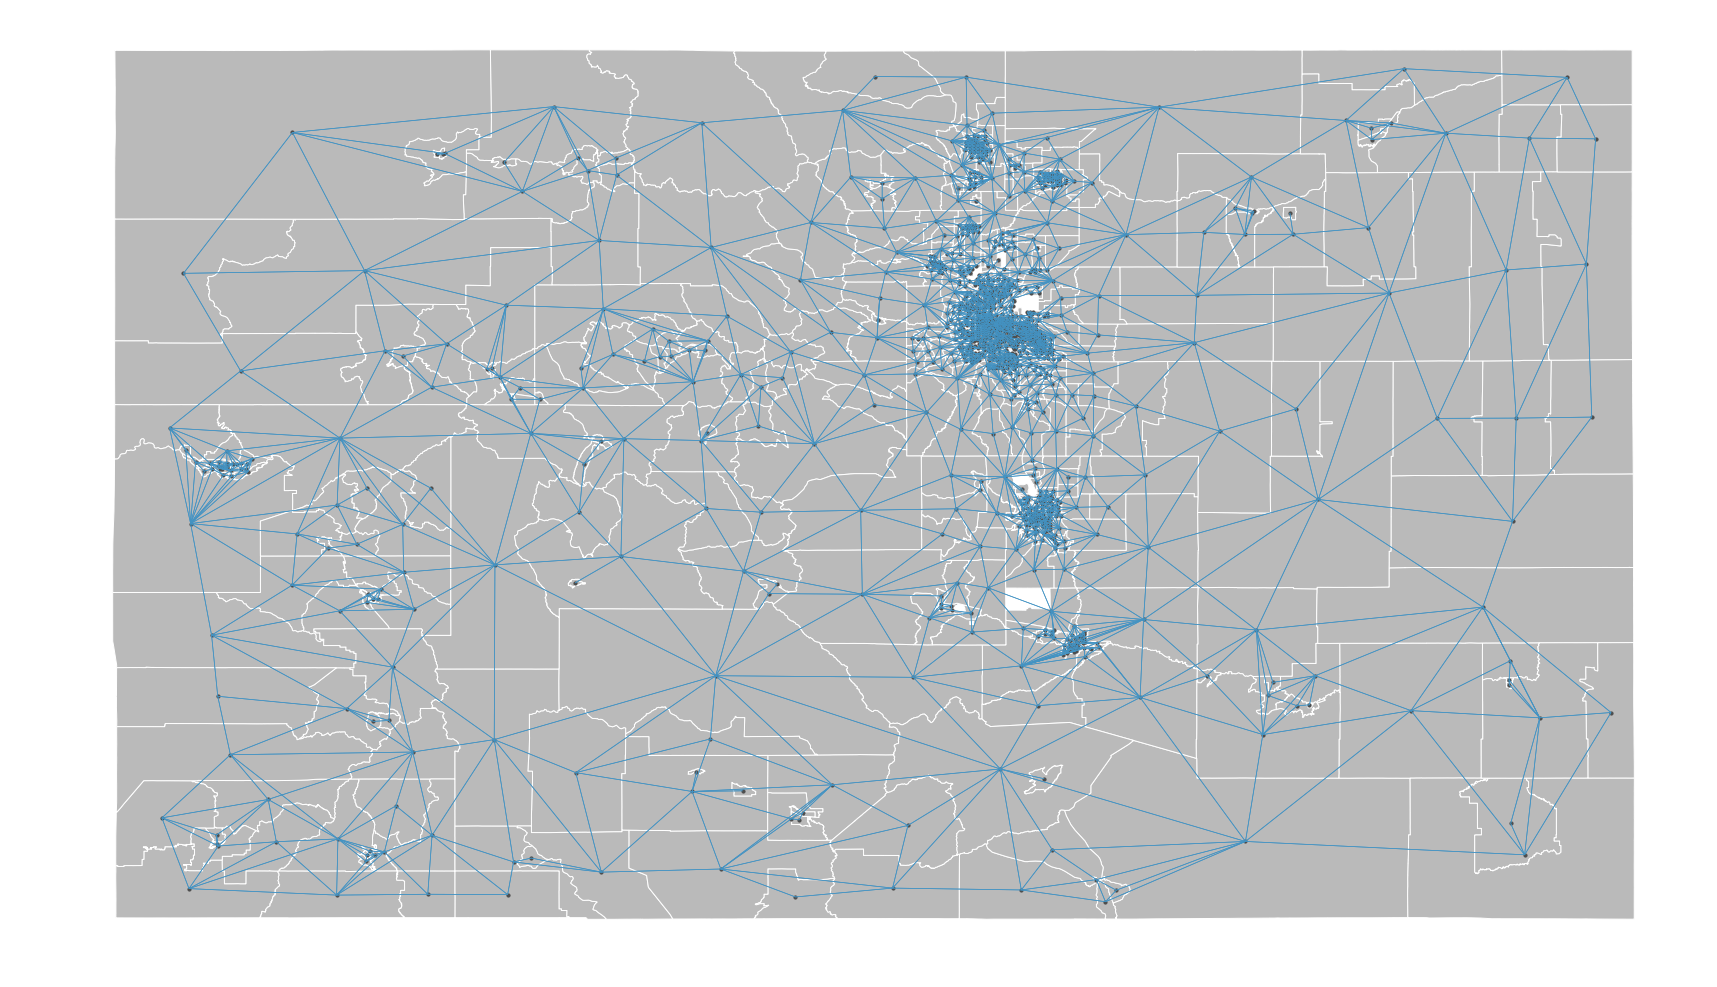

In [32]:
libpysal.plot_spatial_weights(w, fpl15_geo_co_tract,  figsize=(30, 30))

In [33]:
y = fpl15_geo_co_tract["elep"]
ylag = weights.lag_spatial(w, y)

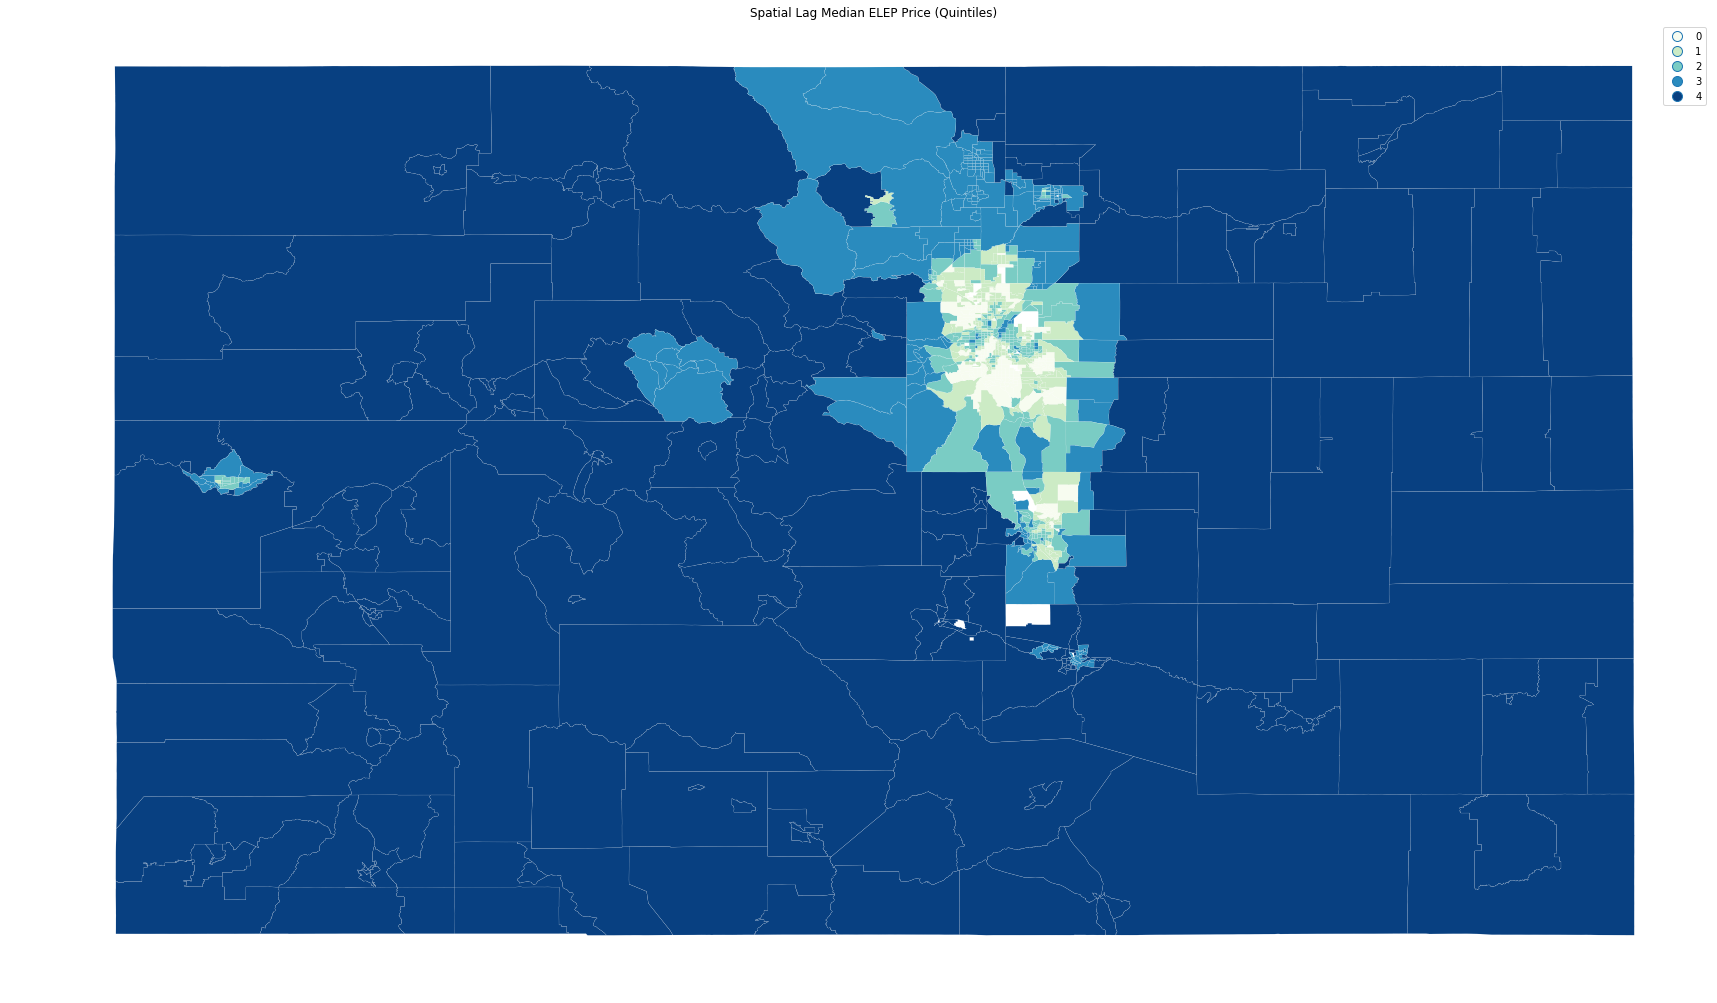

In [34]:
ylagq5 = mc.Quantiles(ylag, k=5)
fig, ax = plt.subplots(1, figsize=(30, 30))
fpl15_geo_co_tract.assign(cl=ylagq5.yb).plot(column="cl", categorical=True, k=5, cmap="GnBu", linewidth=0.1, ax=ax, edgecolor="white", legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Median ELEP Price (Quintiles)")

plt.show()